In [2]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [3]:
cat4 = cv2.imread('CATS_DOGS/train/CAT/4.jpg')

In [4]:
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

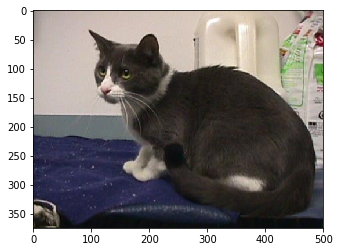

In [5]:
plt.imshow(cat4)

In [49]:
dog2 = cv2.imread('CATS_DOGS/train/DOG/2.jpg')

In [50]:
dog2 = cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)

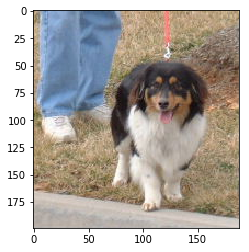

In [51]:
plt.imshow(dog2)

In [52]:
dog2.shape

(199, 188, 3)

In [11]:
cat4.shape

(375, 500, 3)

In [12]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [13]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

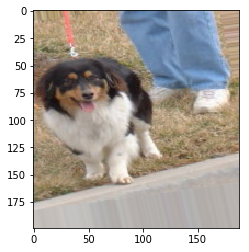

In [20]:
plt.imshow(image_gen.random_transform(dog2))

In [21]:
image_gen.flow_from_directory('CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [24]:
input_shape = (150,150,3)

In [22]:
from keras.models import Sequential

In [26]:
from keras.layers import Dense,Activation,Dropout,Flatten,Conv2D,MaxPooling2D

In [27]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)             0         
__________

In [29]:
batch_size = 16

In [31]:
train_image_gen = image_gen.flow_from_directory('CATS_DOGS/train',
                                               target_size=input_shape[:2],
                                               batch_size = batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [32]:
test_image_gen = image_gen.flow_from_directory('CATS_DOGS/test',
                                               target_size=input_shape[:2],
                                               batch_size = batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [33]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [ ]:
results = model.fit_generator(train_image_gen,epochs=1,steps_per_epoch=150,
                             validation_data=test_mage_gen,validation_steps=12)

In [34]:
from keras.models import load_model

In [35]:
new_model = load_model('../../Computer-Vision-with-Python/06-Deep-Learning-Computer-Vision/cat_dog_100epochs.h5')

In [36]:
dog_file  = 'CATS_DOGS/test/DOG/10005.jpg'

In [37]:
from keras.preprocessing import image

In [38]:
dog_img = image.load_img(dog_file,target_size=(150,150))

In [39]:
dog_img = image.img_to_array(dog_img)

In [40]:
import numpy as np

In [41]:
dog_img = np.expand_dims(dog_img,axis=0)

In [42]:
dog_img.shape

(1, 150, 150, 3)

In [43]:
dog_img = dog_img /255

In [44]:
dog_img.max()

1.0

In [45]:
new_model.predict_classes(dog_img)

array([[1]], dtype=int32)